<a href="https://colab.research.google.com/github/s5263er/GameStop-Sentiment-and-Price-Analysis/blob/main/FIN_INFO_RET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
#IMPORTS
!pip install yfinance
import yfinance as yf
import pandas as pd
import datetime 
import datetime 
import matplotlib.pyplot as plt
import math
import string
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
#LAST 10 YEAR STOCK PRICE
start = datetime.datetime(2013,3,28) 
end = datetime.datetime(2023, 3 ,28)
GME = yf.Ticker("GME") 
df_gme = GME.history(start=start, end=end)
df_gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-03-28 00:00:00-04:00,4.459723,5.063772,4.459723,4.940136,39372800,0.0,0.0
2013-04-01 00:00:00-04:00,4.945435,5.311043,4.933071,5.256290,28086000,0.0,0.0
2013-04-02 00:00:00-04:00,5.252757,5.358731,5.132654,5.341069,16349200,0.0,0.0
2013-04-03 00:00:00-04:00,5.346369,5.406421,5.298681,5.342836,18020400,0.0,0.0
2013-04-04 00:00:00-04:00,5.335770,5.492965,5.208602,5.279251,17995200,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,17.150000,18.350000,17.139999,17.650000,15882900,0.0,0.0
2023-03-22 00:00:00-04:00,26.600000,27.000000,23.049999,23.870001,66764700,0.0,0.0
2023-03-23 00:00:00-04:00,22.570000,24.590000,22.129999,22.580000,11168900,0.0,0.0


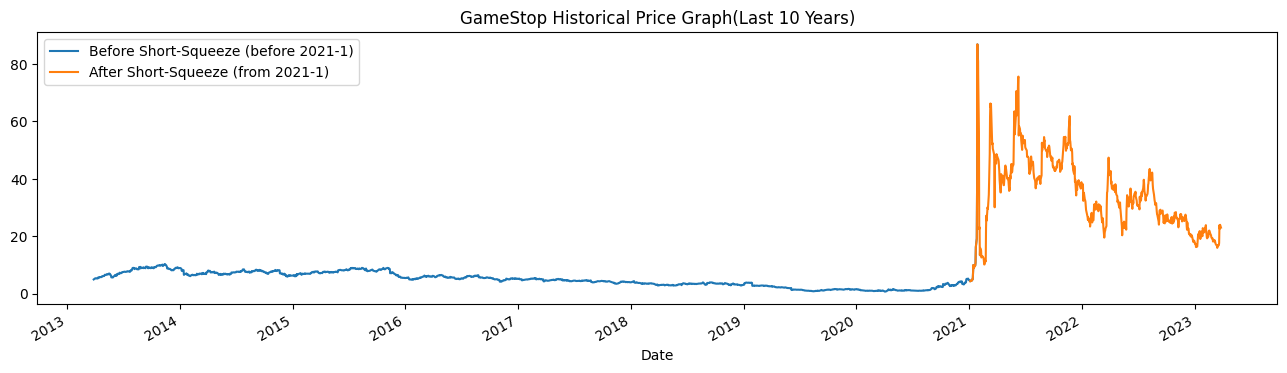

In [121]:
import matplotlib.pyplot as plt
df_gme["Close"][:'2021-1'].plot(figsize=(16,4), legend=True)
df_gme["Close"]["2021-1":].plot(figsize=(16,4), legend=True)
plt.legend(["Before Short-Squeeze (before 2021-1)", "After Short-Squeeze (from 2021-1)"])
plt.title("GameStop Historical Price Graph(Last 10 Years)")
plt.show()
plt.close()

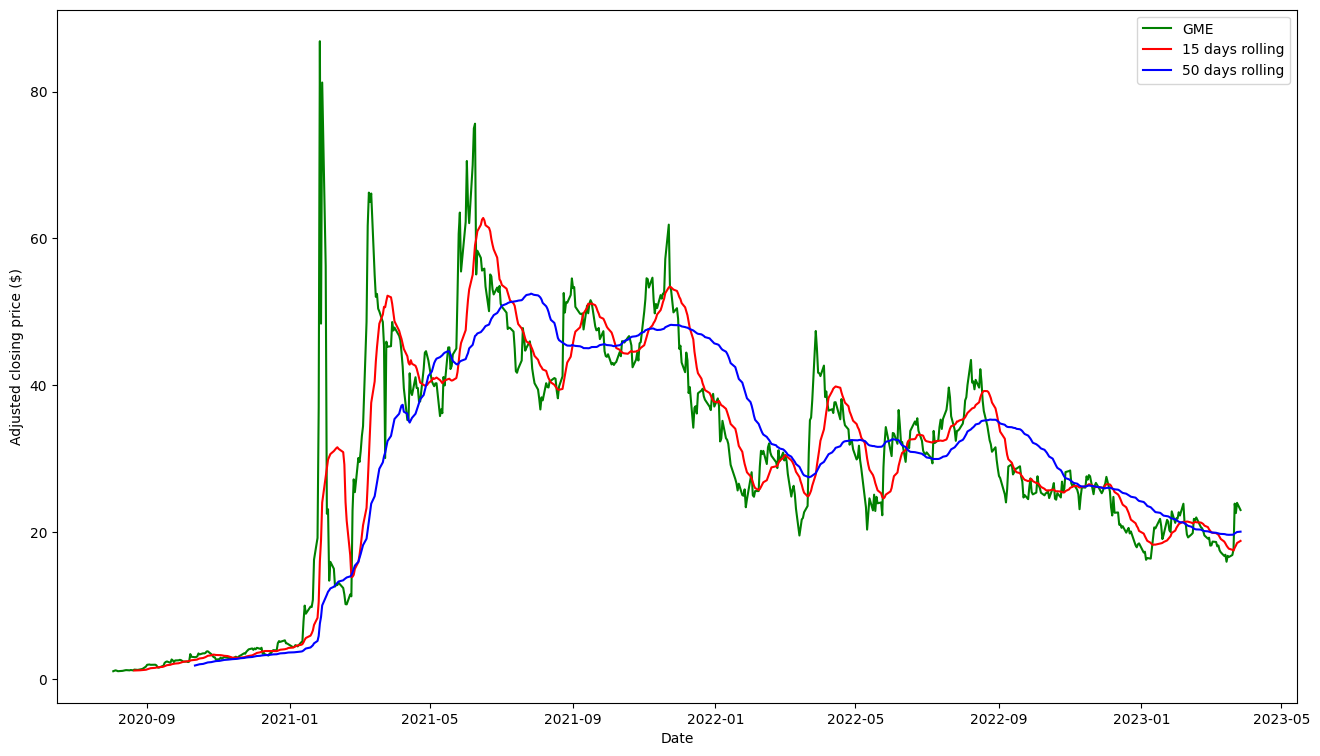

In [122]:
#COMPARING MOVING AVERAGES
df_gme_subset = df_gme["Close"]['2020-8':]
short_rolling_gme = df_gme_subset.rolling(window=15).mean()
long_rolling_gme = df_gme_subset.rolling(window=50).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot( df_gme_subset, label='GME',color = "green")
ax.plot(short_rolling_gme, label='15 days rolling', color = "red")
ax.plot(long_rolling_gme, label='50 days rolling', color = "blue")

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [123]:

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import certifi
import json

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

url = ("https://financialmodelingprep.com/api/v3/key-metrics/GME?apikey=731a4c8b60b5d3cc7ff6696c9a303e42")



#print(get_jsonparsed_data(url))


In [124]:
df_fundamentals = {'date':[],
               'roe':[],
               'peRatio':[],
               'debtToEquity':[],
               'inventoryTurnover':[],
               }

for file in get_jsonparsed_data(url):

  date = file["date"]
  df_fundamentals['date'].append(date)

  roe = file["roe"]
  df_fundamentals['roe'].append(roe)

  peRatio = file["peRatio"]
  df_fundamentals['peRatio'].append(peRatio)

  debtToEquity = file["debtToEquity"]
  df_fundamentals['debtToEquity'].append(debtToEquity)

  inventoryTurnover = file["inventoryTurnover"]
  df_fundamentals['inventoryTurnover'].append(inventoryTurnover)

  



df_fundamentals = pd.DataFrame(df_fundamentals)
df_fundamentals = df_fundamentals[1:11]
df_fundamentals = df_fundamentals.loc[::-1].reset_index(drop=True)
df_fundamentals

<ipython-input-123-2aceaf3b755d>:23: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


,date,roe,peRatio,debtToEquity,inventoryTurnover
0,2013-02-02,-0.117964,-11.571435,0.807987,5.323316
1,2014-02-01,0.157324,11.604190,0.817269,5.320210
2,2015-01-31,0.190115,10.061180,1.053634,5.695405
3,2016-01-30,0.193561,6.897368,1.083085,5.542132
4,2017-01-28,0.156692,7.116801,1.207489,4.992064
5,2018-02-03,0.015669,47.427147,1.276631,4.525134
6,2019-02-02,-0.503667,-1.705207,2.026718,4.779848
7,2020-02-01,-0.770074,-0.713527,3.611120,5.301035
8,2021-01-30,-0.493016,-98.118904,4.662011,6.357344
9,2022-01-29,-0.237941,-18.642187,1.183651,5.096066


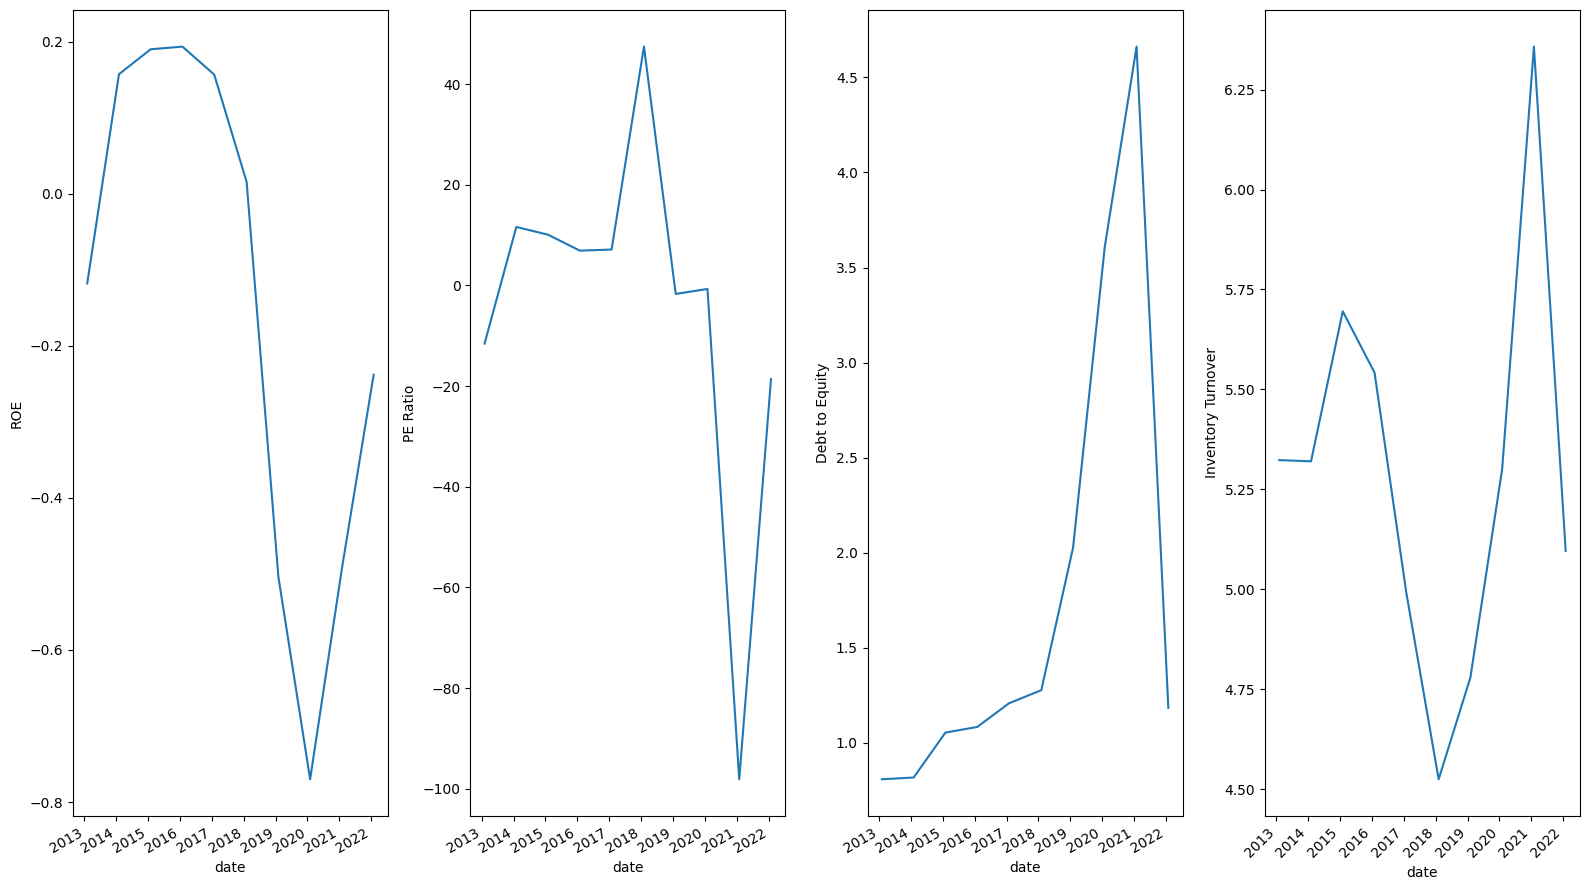

In [125]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Set date as the index
df_fundamentals['date'] = pd.to_datetime(df_fundamentals['date'])
df_fundamentals.set_index('date', inplace=True)

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,9))

df_fundamentals['roe'].plot(ax=axes[0], legend=False)
axes[0].set_ylabel('ROE')

df_fundamentals['peRatio'].plot(ax=axes[1], legend=False)
axes[1].set_ylabel('PE Ratio')

df_fundamentals['debtToEquity'].plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Debt to Equity')

df_fundamentals['inventoryTurnover'].plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Inventory Turnover')


date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

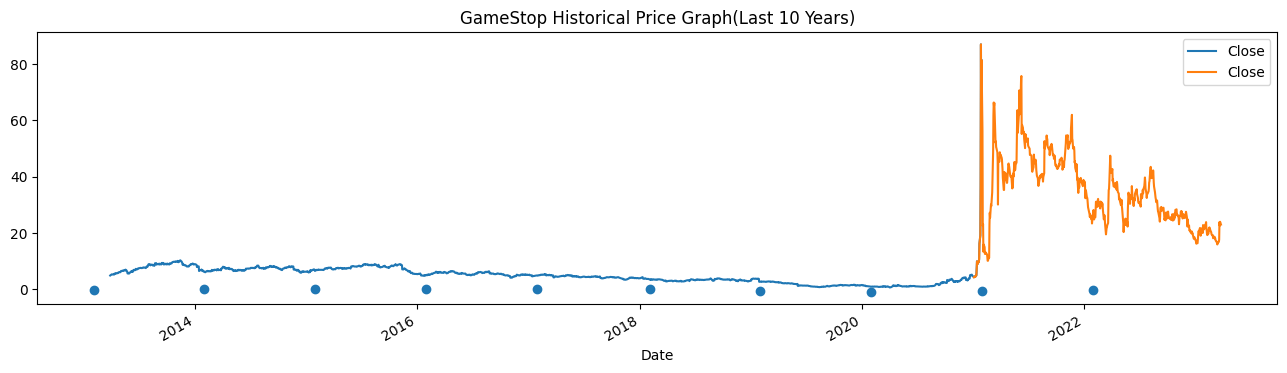

In [126]:
import matplotlib.pyplot as plt
df_gme["Close"][:'2021-1'].plot(figsize=(16,4), legend=True)
df_gme["Close"]["2021-1":].plot(figsize=(16,4), legend=True)

x = ["2013-02-02","2014-02-01","2015-01-31","2016-01-30","2017-01-28","2018-02-03","2019-02-02","2020-02-01","2021-01-30","	2022-01-29"]
y =  list(df_fundamentals['roe'])


plt.scatter(x,y)
plt.title("GameStop Historical Price Graph(Last 10 Years)")
plt.show()

In [127]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/MGT5399/reddit_wsb.csv')

# Print the first 5 rows of the DataFrame
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
...,...,...,...,...,...,...,...,...
53182,What I Learned Investigating SAVA FUD Spreaders,238,owd2pn,https://www.reddit.com/r/wallstreetbets/commen...,87,1.627906e+09,***TLDR: Three bitter scientists partnered up ...,2021-08-02 15:03:27
53183,"Daily Popular Tickers Thread for August 02, 20...",228,owd1a5,https://www.reddit.com/r/wallstreetbets/commen...,1070,1.627906e+09,\nYour daily hype thread. Please keep the shit...,2021-08-02 15:01:03
53184,Hitler reacts to the market being irrational,7398,owc5dr,https://v.redd.it/46jxu074exe71,372,1.627902e+09,NaN,2021-08-02 13:59:35
53185,"Daily Discussion Thread for August 02, 2021",338,owbfjf,https://www.reddit.com/r/wallstreetbets/commen...,11688,1.627898e+09,Your daily trading discussion thread. Please k...,2021-08-02 13:00:16


In [128]:
df = df.dropna(subset=['title', 'body'])
df = df[(df['title'].str.contains(r'\b(Gamestop|GME)\b', case=False)) | 
        (df['body'].str.contains(r'\b(Gamestop|GME)\b', case=False))]
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# sort the DataFrame by the "date" column in ascending order
df = df.sort_values('date', ascending=True)
df

<ipython-input-128-28bc9110ab21>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[(df['title'].str.contains(r'\b(Gamestop|GME)\b', case=False)) |
<ipython-input-128-28bc9110ab21>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df['body'].str.contains(r'\b(Gamestop|GME)\b', case=False))]


,title,score,id,url,comms_num,created,body,timestamp,date
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28
781,"What do I do, I have a Td account and need help.",3,l6wxjo,https://www.reddit.com/r/wallstreetbets/commen...,8,1.611870e+09,\nI have an TD Ameritrade account and I just h...,2021-01-28 23:44:44,2021-01-28
776,ROBINHOOD NO LONGER ALLOWS BUYING OF GME AND A...,29,l6wxqy,https://www.reddit.com/r/wallstreetbets/commen...,15,1.611870e+09,Them doing this means we are winning. They are...,2021-01-28 23:45:00,2021-01-28
773,Gamestonks fallout?,0,l6wxui,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611870e+09,Hey I am very new to this sub but I can tell I...,2021-01-28 23:45:08,2021-01-28
767,Yo they closed down GME stocks on robinhood :(,3,l6wxvr,https://www.reddit.com/r/wallstreetbets/commen...,1,1.611870e+09,i can't buy more :((,2021-01-28 23:45:10,2021-01-28
...,...,...,...,...,...,...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,0,p2ltzn,https://www.reddit.com/r/wallstreetbets/commen...,25,1.628715e+09,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11 23:50:57,2021-08-11
52491,CLOV🍀 you Irish fucks,753,p32sdk,https://www.reddit.com/r/wallstreetbets/commen...,134,1.628784e+09,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12 19:00:13,2021-08-12
52433,My loss porn this year (-$35k) with current aw...,84,p3mni4,https://www.reddit.com/r/wallstreetbets/commen...,49,1.628867e+09,I'm down almost $20k worth of deposits and -$3...,2021-08-13 18:08:37,2021-08-13
52408,Follow The Money II - Understanding Sectors An...,224,p3sv17,https://www.reddit.com/r/wallstreetbets/commen...,61,1.628885e+09,# I. Introduction\n\nI think the **hardest par...,2021-08-13 23:00:11,2021-08-13


In [129]:
df = df.drop(columns=['url', 'created', 'id', 'score', 'comms_num', 'timestamp'])
df

,title,body,date
2,Exit the system,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28
781,"What do I do, I have a Td account and need help.",\nI have an TD Ameritrade account and I just h...,2021-01-28
776,ROBINHOOD NO LONGER ALLOWS BUYING OF GME AND A...,Them doing this means we are winning. They are...,2021-01-28
773,Gamestonks fallout?,Hey I am very new to this sub but I can tell I...,2021-01-28
767,Yo they closed down GME stocks on robinhood :(,i can't buy more :((,2021-01-28
...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11
52491,CLOV🍀 you Irish fucks,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12
52433,My loss porn this year (-$35k) with current aw...,I'm down almost $20k worth of deposits and -$3...,2021-08-13
52408,Follow The Money II - Understanding Sectors An...,# I. Introduction\n\nI think the **hardest par...,2021-08-13


In [130]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
# Words to not include in Word Clouds
my_stopwords = set(STOPWORDS)
# Additional phrases I don't want picked up in word clouds
my_stopwords.update(['https', 'http', '\n', '\t'])

In [131]:
def text_clean(mess):
    nopunct = [char for char in mess if char not in string.punctuation]
    nopunct = ''.join(nopunct)
    return nopunct

In [132]:
title_text = text_clean(df['title'])

In [133]:
body_text = text_clean(df['body'])

(-0.5, 399.5, 199.5, -0.5)

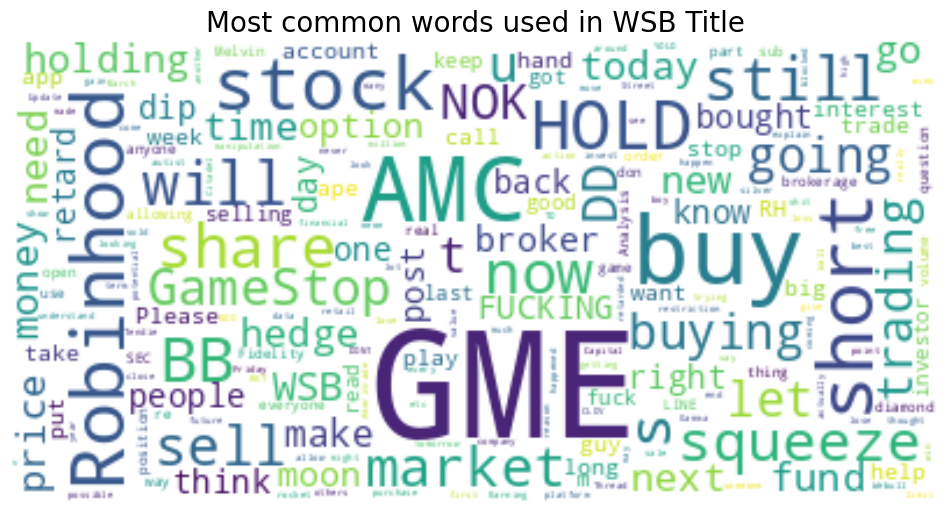

In [134]:
#Creating Title Word Cloud
title_wc = WordCloud(stopwords = my_stopwords, background_color='white', collocations = False).generate(title_text)
plt.figure(figsize=(12,10))
plt.imshow(title_wc, interpolation='bilinear')
plt.title('Most common words used in WSB Title', fontsize = 20)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

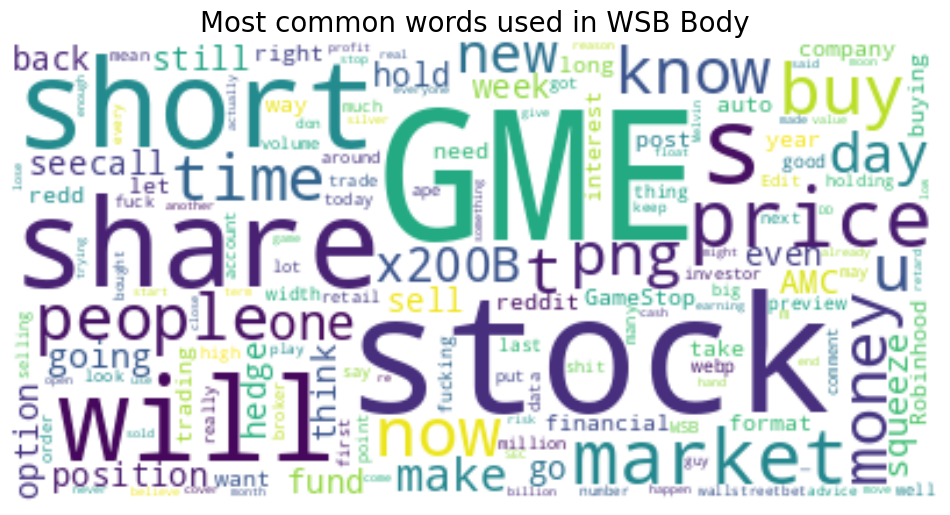

In [135]:
#Creating Title Word Cloud
title_wc = WordCloud(stopwords = my_stopwords, background_color='white', collocations = False).generate(body_text)
plt.figure(figsize=(12,10))
plt.imshow(title_wc, interpolation='bilinear')
plt.title('Most common words used in WSB Body', fontsize = 20)
plt.axis('off')

In [136]:
from textblob import TextBlob

# define a function to calculate the sentiment polarity score of a text
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# calculate the sentiment polarity score for each row and take the mean of the "title" and "body" scores
df['sentiment'] = df.apply(lambda row: max(get_sentiment_score(row['title']), get_sentiment_score(row['body'])), axis=1)


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9812 entries, 2 to 52372
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      9812 non-null   object 
 1   body       9812 non-null   object 
 2   date       9812 non-null   object 
 3   sentiment  9812 non-null   float64
dtypes: float64(1), object(3)
memory usage: 383.3+ KB


In [138]:
df['num_posts'] = df.groupby('date')['title'].transform('count')
df['date'] = pd.to_datetime(df['date'])
df['sentiment_avg'] = df.groupby(df['date'].dt.date)['sentiment'].transform('mean')
df

,title,body,date,sentiment,num_posts,sentiment_avg
2,Exit the system,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28,0.019937,321,0.133421
781,"What do I do, I have a Td account and need help.",\nI have an TD Ameritrade account and I just h...,2021-01-28,0.000000,321,0.133421
776,ROBINHOOD NO LONGER ALLOWS BUYING OF GME AND A...,Them doing this means we are winning. They are...,2021-01-28,0.000000,321,0.133421
773,Gamestonks fallout?,Hey I am very new to this sub but I can tell I...,2021-01-28,0.125857,321,0.133421
767,Yo they closed down GME stocks on robinhood :(,i can't buy more :((,2021-01-28,-0.125000,321,0.133421
...,...,...,...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11,0.111667,2,0.108565
52491,CLOV🍀 you Irish fucks,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12,0.000849,1,0.000849
52433,My loss porn this year (-$35k) with current aw...,I'm down almost $20k worth of deposits and -$3...,2021-08-13,0.121605,2,0.109846
52408,Follow The Money II - Understanding Sectors An...,# I. Introduction\n\nI think the **hardest par...,2021-08-13,0.098087,2,0.109846


In [139]:
df_gme['date'] = df_gme.index.date
df_gme['date'] = pd.to_datetime(df_gme['date'])
df_gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
2013-03-28 00:00:00-04:00,4.459723,5.063772,4.459723,4.940136,39372800,0.0,0.0,2013-03-28
2013-04-01 00:00:00-04:00,4.945435,5.311043,4.933071,5.256290,28086000,0.0,0.0,2013-04-01
2013-04-02 00:00:00-04:00,5.252757,5.358731,5.132654,5.341069,16349200,0.0,0.0,2013-04-02
2013-04-03 00:00:00-04:00,5.346369,5.406421,5.298681,5.342836,18020400,0.0,0.0,2013-04-03
2013-04-04 00:00:00-04:00,5.335770,5.492965,5.208602,5.279251,17995200,0.0,0.0,2013-04-04
...,...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,17.150000,18.350000,17.139999,17.650000,15882900,0.0,0.0,2023-03-21
2023-03-22 00:00:00-04:00,26.600000,27.000000,23.049999,23.870001,66764700,0.0,0.0,2023-03-22
2023-03-23 00:00:00-04:00,22.570000,24.590000,22.129999,22.580000,11168900,0.0,0.0,2023-03-23


In [148]:
merged_df_gme = pd.merge(df_gme, df, on='date', how='left')

# filter out rows with dates outside the range of interest
start_date = pd.Timestamp('2021-01-28')
end_date = pd.Timestamp('2021-08-14')
merged_df_gme = merged_df_gme[(merged_df_gme['date'] >= start_date) & (merged_df_gme['date'] <= end_date)]

# group by date and aggregate the sentiment values
merged_df_gme = merged_df_gme.groupby('date').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'max', 'Dividends': 'max', 'Stock Splits': 'max', 'sentiment_avg': 'max','num_posts': 'max'})

# reset the index to include the "date" column
merged_df_gme = merged_df_gme.reset_index()
merged_df_gme['avg_price'] = merged_df_gme[['Open', 'High', 'Low', 'Close']].mean(axis=1)

# print the resulting dataframe
merged_df_gme

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sentiment_avg,num_posts,avg_price
0,2021-01-28,66.250000,120.750000,28.062500,48.400002,235263200,0.0,0.0,0.133421,321.0,65.865625
1,2021-01-29,94.927498,103.495003,62.500000,81.250000,202264400,0.0,0.0,0.129812,3597.0,85.543125
2,2021-02-01,79.139999,80.500000,53.000000,56.250000,149528800,0.0,0.0,0.111640,231.0,67.222500
3,2021-02-02,35.189999,39.500000,18.555000,22.500000,312732400,0.0,0.0,0.134445,241.0,28.936250
4,2021-02-03,28.002501,28.350000,21.312500,23.102501,170794000,0.0,0.0,0.132151,398.0,25.191875
...,...,...,...,...,...,...,...,...,...,...,...
133,2021-08-09,37.950001,41.177502,37.665001,40.282501,8996800,0.0,0.0,0.846154,1.0,39.268751
134,2021-08-10,40.340000,41.724998,38.837502,39.762501,6493200,0.0,0.0,NaN,NaN,40.166250
135,2021-08-11,39.607498,39.762501,38.654999,39.695000,3781600,0.0,0.0,0.108565,2.0,39.429999
136,2021-08-12,39.970001,41.070000,39.332500,40.587502,5271200,0.0,0.0,0.000849,1.0,40.240001


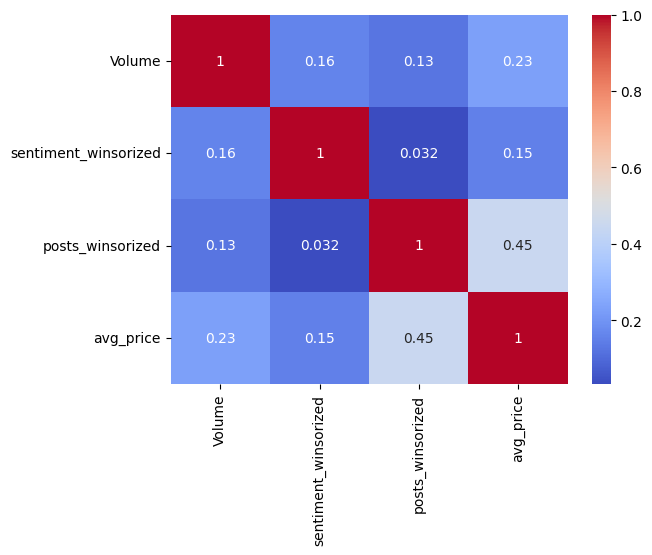

In [149]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()

In [150]:
# standardize the variables
merged_df_gme['Volume'] = (merged_df_gme['Volume'] - merged_df_gme['Volume'].mean()) / merged_df_gme['Volume'].std()
merged_df_gme['sentiment_avg'] = (merged_df_gme['sentiment_avg'] - merged_df_gme['sentiment_avg'].mean()) / merged_df_gme['sentiment_avg'].std()
merged_df_gme['num_posts'] = (merged_df_gme['num_posts'] - merged_df_gme['num_posts'].mean()) / merged_df_gme['num_posts'].std()
merged_df_gme['avg_price'] = (merged_df_gme['avg_price'] - merged_df_gme['avg_price'].mean()) / merged_df_gme['avg_price'].std()

# compute the correlation matrix
corr_matrix = merged_df_gme[['Volume', 'sentiment_avg', 'num_posts', 'avg_price']].corr()

# display the correlation matrix
print(corr_matrix)

                 Volume  sentiment_avg  num_posts  avg_price
Volume         1.000000      -0.247995   0.273765  -0.152151
sentiment_avg -0.247995       1.000000  -0.075829   0.055328
num_posts      0.273765      -0.075829   1.000000   0.210469
avg_price     -0.152151       0.055328   0.210469   1.000000


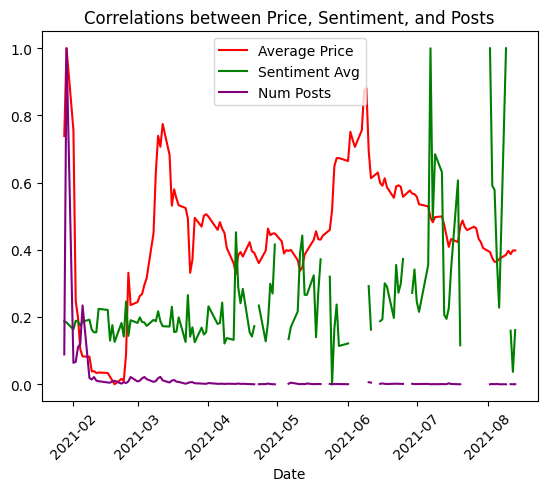

In [151]:
#WITHOUT WINSOR
# normalize the data using min-max scaling
avg_price_norm = (merged_df_gme['avg_price'] - merged_df_gme['avg_price'].min()) / (merged_df_gme['avg_price'].max() - merged_df_gme['avg_price'].min())
sentiment_norm = (merged_df_gme['sentiment_avg'] - merged_df_gme['sentiment_avg'].min()) / (merged_df_gme['sentiment_avg'].max() - merged_df_gme['sentiment_avg'].min())
posts_norm = (merged_df_gme['num_posts'] - merged_df_gme['num_posts'].min()) / (merged_df_gme['num_posts'].max() - merged_df_gme['num_posts'].min())

# create a figure and axis object
fig, ax = plt.subplots()

# plot the normalized data on the same y-axis
ax.plot(merged_df_gme['date'], avg_price_norm, color='red', label='Average Price')
ax.plot(merged_df_gme['date'], sentiment_norm, color='green', label='Sentiment Avg')
ax.plot(merged_df_gme['date'], posts_norm, color='purple', label='Num Posts')

# set the x-axis label and title
ax.set_xlabel('Date')
ax.set_title('Correlations between Price, Sentiment, and Posts')
plt.xticks(rotation=45)
# create a legend
ax.legend()

# display the plot
plt.show()

In [152]:
from scipy.stats.mstats import winsorize

# winsorize the sentiment_avg and num_posts columns
sentiment_winsorized = winsorize(merged_df_gme['sentiment_avg'], limits=[0.01, 0.01])
posts_winsorized = winsorize(merged_df_gme['num_posts'], limits=[0.01, 0.01])

# add the winsorized columns to the merged_df_gme dataframe
merged_df_gme['sentiment_winsorized'] = sentiment_winsorized
merged_df_gme['posts_winsorized'] = posts_winsorized

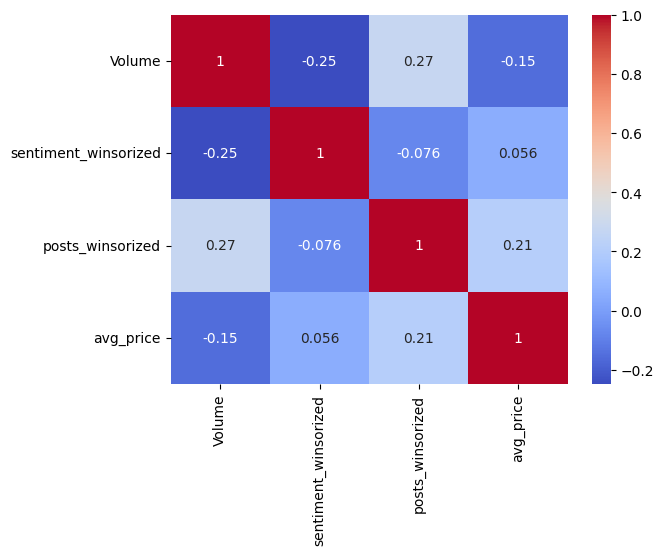

In [153]:
# standardize the variables
merged_df_gme['Volume'] = (merged_df_gme['Volume'] - merged_df_gme['Volume'].mean()) / merged_df_gme['Volume'].std()
merged_df_gme['sentiment_winsorized'] = (merged_df_gme['sentiment_winsorized'] - merged_df_gme['sentiment_winsorized'].mean()) / merged_df_gme['sentiment_winsorized'].std()
merged_df_gme['posts_winsorized'] = (merged_df_gme['posts_winsorized'] - merged_df_gme['posts_winsorized'].mean()) / merged_df_gme['posts_winsorized'].std()
merged_df_gme['avg_price'] = (merged_df_gme['avg_price'] - merged_df_gme['avg_price'].mean()) / merged_df_gme['avg_price'].std()

# compute the correlation matrix
corr_matrix = merged_df_gme[['Volume', 'sentiment_winsorized', 'posts_winsorized', 'avg_price']].corr()

# display the correlation matrix
#print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()

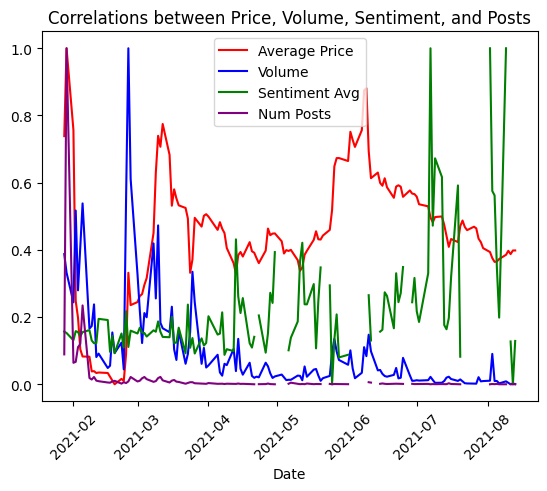

In [154]:

# normalize the data using min-max scaling
avg_price_norm = (merged_df_gme['avg_price'] - merged_df_gme['avg_price'].min()) / (merged_df_gme['avg_price'].max() - merged_df_gme['avg_price'].min())
volume_norm = (merged_df_gme['Volume'] - merged_df_gme['Volume'].min()) / (merged_df_gme['Volume'].max() - merged_df_gme['Volume'].min())
sentiment_norm = (merged_df_gme['sentiment_winsorized'] - merged_df_gme['sentiment_winsorized'].min()) / (merged_df_gme['sentiment_winsorized'].max() - merged_df_gme['sentiment_winsorized'].min())
posts_norm = (merged_df_gme['posts_winsorized'] - merged_df_gme['posts_winsorized'].min()) / (merged_df_gme['posts_winsorized'].max() - merged_df_gme['posts_winsorized'].min())

# create a figure and axis object
fig, ax = plt.subplots()

# plot the normalized data on the same y-axis
ax.plot(merged_df_gme['date'], avg_price_norm, color='red', label='Average Price')
ax.plot(merged_df_gme['date'], volume_norm, color='blue', label='Volume')
ax.plot(merged_df_gme['date'], sentiment_norm, color='green', label='Sentiment Avg')
ax.plot(merged_df_gme['date'], posts_norm, color='purple', label='Num Posts')

# set the x-axis label and title
ax.set_xlabel('Date')
ax.set_title('Correlations between Price, Volume, Sentiment, and Posts')

# create a legend
ax.legend()
plt.xticks(rotation=45)

# display the plot
plt.show()